In [1]:
import numpy as np
import pandas as pd
import healpy as hp
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
from DS_Planck_Unet import west_val, east_val
from DS_Planck_Unet import load_planck_model, draw_pic_with_mask, draw_pic, val_pix
from DS_healpix_fragmentation import *
from DS_data_transformation import pic2fits, normalize
#from DS_detector import *
import os
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm.notebook import tqdm
from DS_data_transformation import normalize
from DS_models_stat import stat_orig_cats_simple, cut_cat
from DS_healpix_fragmentation import cut_cat_by_pix

In [24]:
cat_file = '/home/rt2122/Data/SRGz/brcat.csv'
det_name='brcat'
det_cat = pd.read_csv(cat_file)
det_cat['max_pred'].min(), det_cat['max_pred'].max()

(5.000039, 84.39291)

In [21]:
n_bins = 20
max_pred_unite = np.array(det_cat['max_pred'].quantile(np.arange(1/n_bins, 1, 1/n_bins)))
max_pred_unite

array([ 5.05335105,  5.1069375 ,  5.1630591 ,  5.223298  ,  5.29437   ,
        5.3639328 ,  5.43414885,  5.5157134 ,  5.60974235,  5.711204  ,
        5.8320221 ,  5.9664762 ,  6.12062285,  6.2958075 ,  6.52273275,
        6.826352  ,  7.2506403 ,  8.0152959 , 10.0664315 ])

In [54]:
big_pix = [41] 
pixname = '41'
cat_d = {max_pred_prm : cut_cat(det_cat, {'max_pred' : [max_pred_prm, np.inf]}) for max_pred_prm in max_pred_unite}

In [55]:
recall_df = stat_orig_cats_simple(cat_d, big_pix=big_pix, read_det_files=False, match_dist=400/3600, 
                                 spec_precision=['PSZ2(z)', 'eROSITA'])
recall_df = recall_df.sort_index()
recall_df.index.name='max_pred'
recall_df.to_csv('./check/{}_recall_max_pred_pix{}.csv'.format(det_name, pixname))

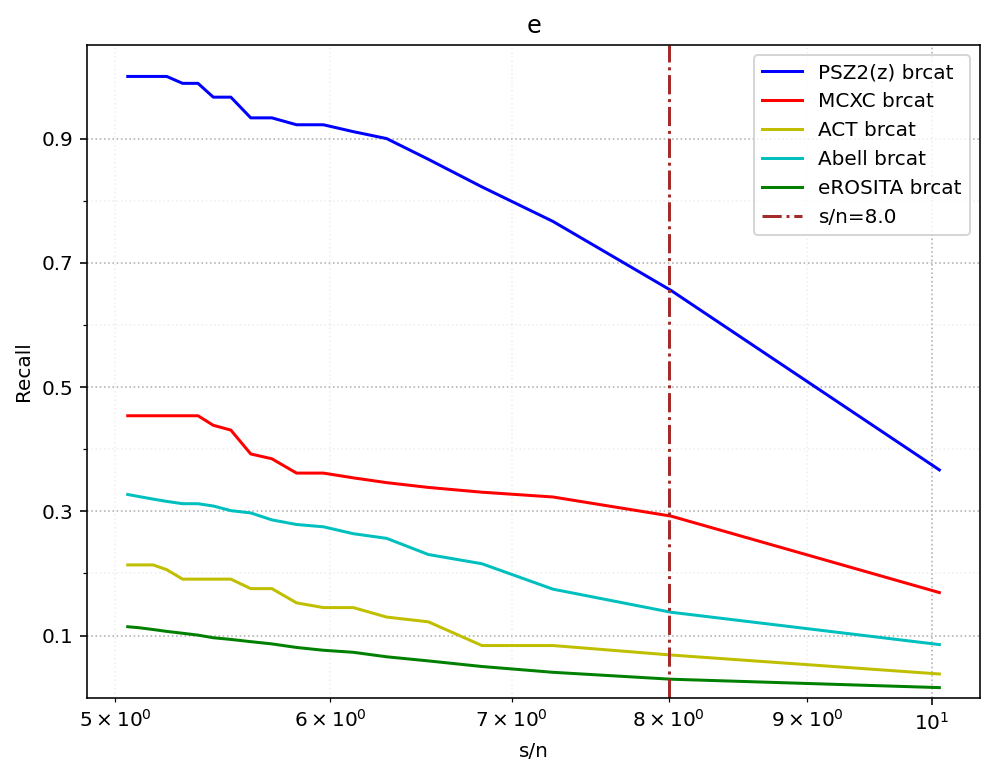

In [62]:
pixname = 'e'
selected = ['PSZ2(z)', 'MCXC', 'ACT', 'Abell', 'eROSITA']
df = pd.read_csv('./check/{}_recall_max_pred_pix{}.csv'.format(det_name, pixname), index_col=['max_pred'])

_, ax = plt.subplots(1, 1, figsize=(8, 6))
for c, name in zip('brycg', selected):
    s, = ax.plot(df.index, df[name], c=c, linestyle='-')
    s.set_label(name + ' ' + det_name)
ax.set_ylabel('Recall')
ax.set_title(pixname)
this_ax(ax)
plt.show()

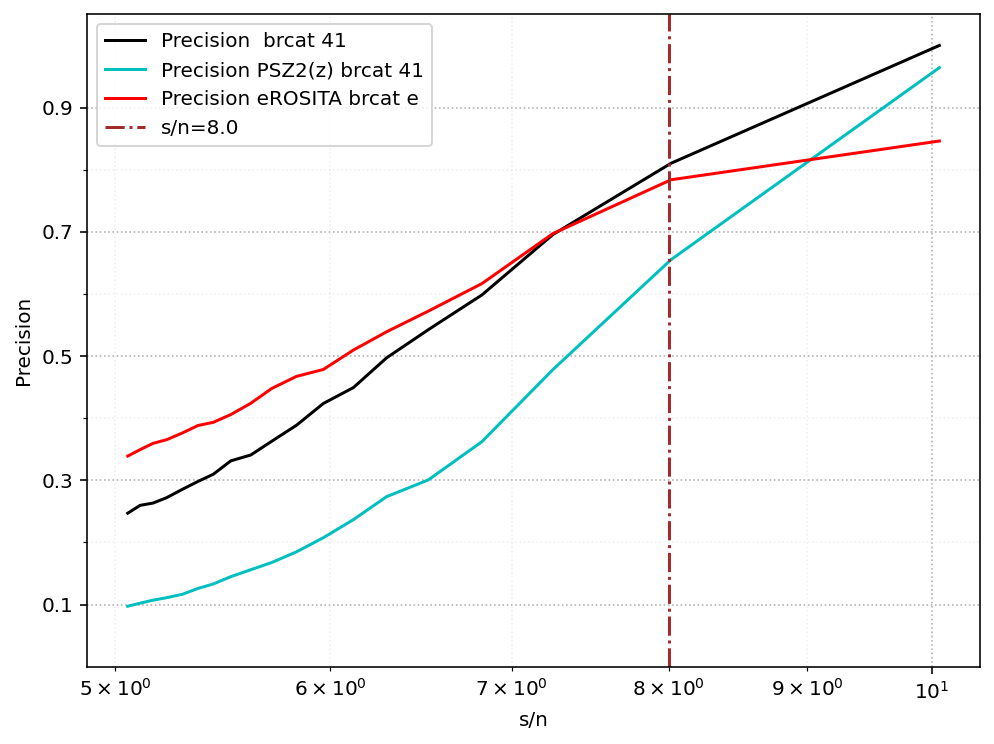

In [63]:
def plot_precision(ax, pixname, show_basic, selected, colors='kcr'):
    
    df = pd.read_csv('./check/{}_recall_max_pred_pix{}.csv'.format(det_name, pixname), index_col=['max_pred'])
    for prec, c in zip(selected, colors):
        prm = 'precision' if prec == '' else 'precision_' + prec
        s, = ax.plot(df.index, df[prm], c=c, linestyle='-')
        s.set_label('Precision '+ prec + ' ' + det_name+ ' ' + pixname)

show_basic = True 

_, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_precision(ax, pixname='41', show_basic=show_basic, selected=['', 'PSZ2(z)'])            
plot_precision(ax, pixname='e', show_basic=show_basic, selected=['eROSITA'], colors='r')
            
ax.set_ylabel('Precision')
this_ax(ax)
plt.show()